In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

from numpy.fft import fft, fftshift, fftfreq

In [2]:
def line_code(num_bits, 
              line_amplitudes=[+1, -1], 
              pulse = np.array([1]*20) ):
  
  pulse_len=len(pulse)
  out_len = num_bits * pulse_len
  
  amplitudes = npr.choice(line_amplitudes, size=num_bits)
  out = np.outer(amplitudes, pulse)
  
  return np.reshape(out, (out_len))

  

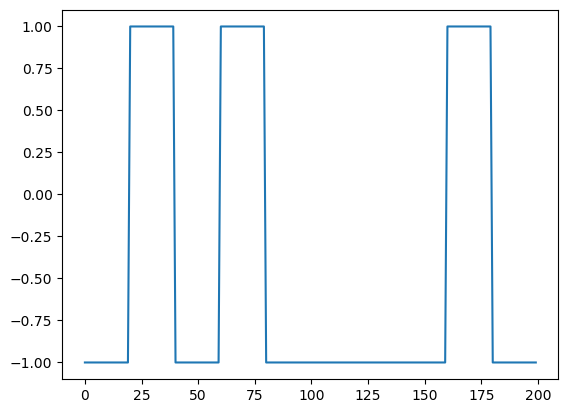

In [7]:
plt.plot(line_code(10))

Let's assume 1 Mbit/s. Each pulse lasts 

In [4]:
1/1e6

1e-06

We will use pulses that are 20 samples long. So each sample lasts

In [5]:
1e-6/20

5e-08

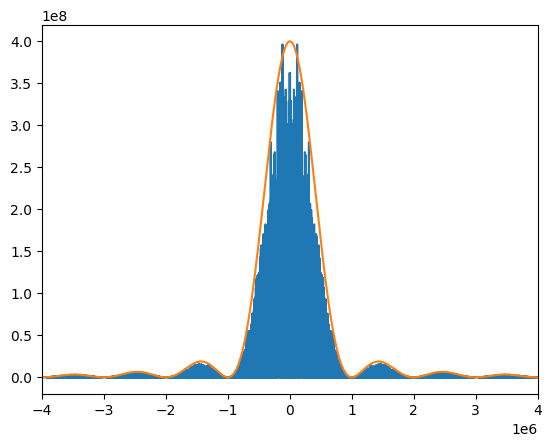

In [12]:
# Bipolar NRZ

num_bits = 100_000

f = fftshift( fftfreq(num_bits*20, 5e-8) )

bipolar_nrz = line_code(num_bits)
Bipolar_nrz = fftshift( fft(bipolar_nrz) )

plt.plot(f, np.abs(Bipolar_nrz)**2)
plt.xlim(-4e6,4e6)

plt.plot(f, 4e8*(np.sinc(f*1e-6))**2)

(0.0, 200000000.0)

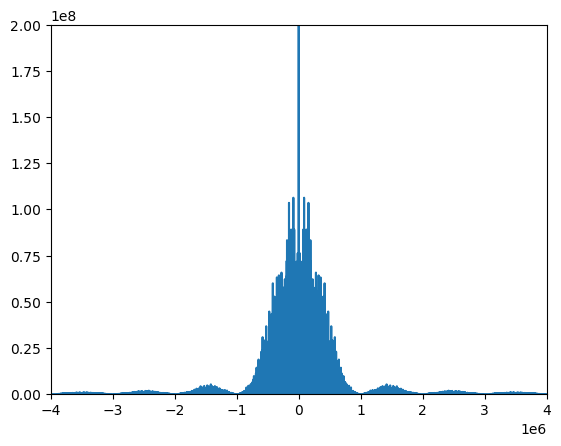

In [15]:
# Unipolar NRZ

num_bits = 100_000

f = fftshift( fftfreq(num_bits*20, 5e-8) )

unipolar_nrz = line_code(num_bits, line_amplitudes=[0,1])
Unipolar_nrz = fftshift( fft(unipolar_nrz) )

plt.plot(f, np.abs(Unipolar_nrz)**2)
plt.xlim(-4e6,4e6)
plt.ylim(0,2e8)